## importing necessary packages

In [243]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns

## concating train and test data 

In [244]:

train_dataSet = pd.read_csv('./data/train.csv')
test_dataSet = pd.read_csv('./data/test.csv') 
whole_dataSet = pd.concat([train_dataSet, test_dataSet])
whole_dataSet

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,NaN
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,NaN
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,NaN
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,NaN


### Dropping missing values, unnecessary features, and modifying some columns

In [245]:
whole_dataSet.replace('NaN ' , np.nan , inplace=True) # some values are NaN string with extra space 
# i replaced them with real nan value and then droped them 

In [246]:
whole_dataSet.dropna(inplace=True)

### converting time_taken to integer values Removing extra spaces from some column values

In [247]:
whole_dataSet['Time_taken(min)'] =whole_dataSet['Time_taken(min)'].apply(lambda x : int(x.replace('(min)', ''))) 
whole_dataSet['Road_traffic_density'] =whole_dataSet['Road_traffic_density'].apply(lambda x:x.strip())


### Converting date and time data to Pandas datetime format

In [248]:
whole_dataSet['Time_Orderd'] = whole_dataSet['Time_Orderd'].apply(lambda x: pd.to_datetime(x).time())
whole_dataSet['Time_Order_picked'] = whole_dataSet['Time_Order_picked'].apply(lambda x:pd.to_datetime(x).time())
whole_dataSet['Order_Date'] = pd.to_datetime(whole_dataSet['Order_Date'] , dayfirst=True)

### After converting strings to Pandas datetime, I created time periods to analyze how orders and other features correlate with these time periods

In [249]:
bins = [
    pd.to_datetime('00:00').time(), 
    pd.to_datetime('04:00').time(),
    pd.to_datetime('07:00').time(), 
    pd.to_datetime('10:00').time(), 
    pd.to_datetime('13:00').time(), 
    pd.to_datetime('16:00').time(), 
    pd.to_datetime('19:00').time(),
    pd.to_datetime('22:00').time(),
    pd.to_datetime('23:59').time()
]
labels = ['00:00-04:00', '04:00-07:00', '07:00-10:00', '10:00-13:00', 
          '13:00-16:00', '16:00-19:00', '19:00-22:00', '22:00-23:59']
def assign_time_period(time): 
    for i in range(len(bins) - 1): 
        if bins[i] <= time < bins[i+1]: 
            return labels[i]
whole_dataSet['time_periods']= whole_dataSet['Time_Orderd'].apply(assign_time_period)

### removing extra spaces from som columns

## saving clean data

In [250]:
whole_dataSet.to_csv('./data/clean_data.csv')

In [251]:
whole_dataSet

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time_periods
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,10:00-13:00
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,19:00-22:00
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,07:00-10:00
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,16:00-19:00
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,13:00-16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,...,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,10:00-13:00
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,...,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,19:00-22:00
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,...,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,22:00-23:59
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,...,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,13:00-16:00


In [252]:
weather_filter = whole_dataSet[['Weatherconditions' , 'Time_taken(min)']]

## Analyzing the impact of weather on delivery time and total orders

In [253]:
weather_group = weather_filter.groupby('Weatherconditions')
mean_time_by_condition = weather_filter.groupby('Weatherconditions')['Time_taken(min)'].mean().round(2)
mean_time_by_condition

Weatherconditions
conditions Cloudy        29.14
conditions Fog           29.17
conditions Sandstorms    26.11
conditions Stormy        26.11
conditions Sunny         22.14
conditions Windy         26.36
Name: Time_taken(min), dtype: float64

In [254]:
mean_weather_df = pd.DataFrame(mean_time_by_condition).reset_index()
mean_weather_df['total_orders']=  whole_dataSet['Weatherconditions'].value_counts().values
#Removed repetitive words for clarity, simplifying conditions like "sunny" and "windy" to their raw form
mean_weather_df['Weatherconditions']  = mean_weather_df['Weatherconditions'].apply(lambda x : x.replace('conditions' , '').strip())
mean_weather_df.to_csv('./data/visualizations_df/weather_timeTaken.csv' , index=False)


### Visualizing total orders alongside weather conditions and delivery time

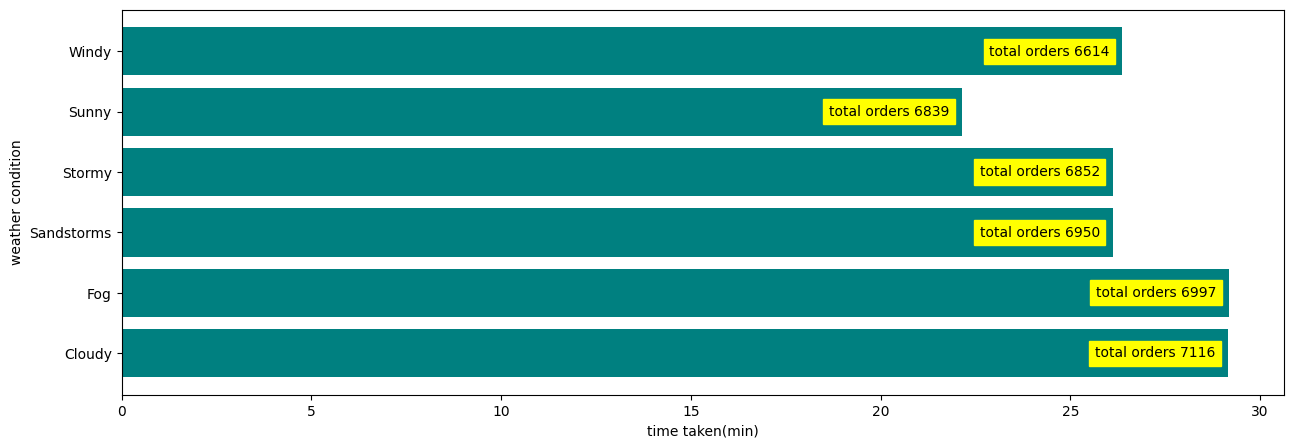

In [255]:
fig , ax = plt.subplots(figsize=(15,5))
bars = ax.barh(mean_weather_df['Weatherconditions'], mean_weather_df['Time_taken(min)'] , color='teal')
ax.set_xlabel('time taken(min)')
ax.set_ylabel('weather condition')
for bar, count in zip(bars, mean_weather_df['total_orders']):
    ax.text(bar.get_width()-3.5, bar.get_y() + bar.get_height()/2, 
            f'total orders {count}', 
            va='center', ha='left', color='black', fontsize=10 , bbox=dict(facecolor='yellow', edgecolor='yellow'))

### Preparing data for traffic analysis

In [256]:
traffic = whole_dataSet[['Road_traffic_density' ,'Time_taken(min)' , 'Type_of_vehicle' ,'Time_Orderd' , 'time_periods']]
traffic.to_csv('./data/visualizations_df/traffic.csv', index=False)

In [257]:
mean_traffic_df = traffic.groupby('Road_traffic_density')['Time_taken(min)'].mean().round(2)
mean_traffic_df = pd.DataFrame(mean_traffic_df).reset_index()
mean_traffic_df.to_csv('./data/visualizations_df/mean_traffic_df.csv' , index=False)
mean_traffic_df


,Road_traffic_density,Time_taken(min)
0,High,27.41
1,Jam,31.40
2,Low,21.49
3,Medium,26.90


Text(0, 0.5, 'time_taken')

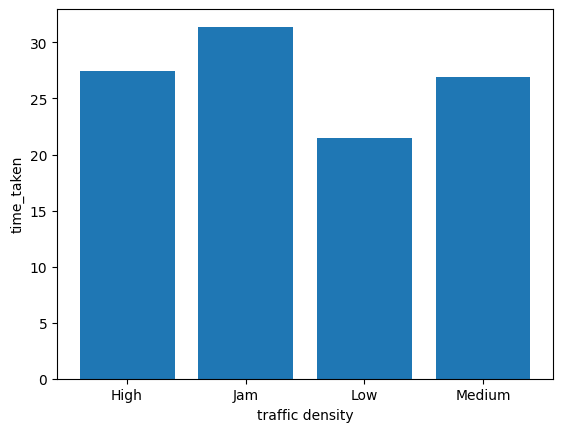

In [258]:
fig ,axes = plt.subplots()
axes.bar(mean_traffic_df['Road_traffic_density'] , mean_traffic_df['Time_taken(min)'])
axes.set_xlabel('traffic density')
axes.set_ylabel("time_taken")

<Axes: xlabel='Type_of_vehicle', ylabel='Road_traffic_density'>

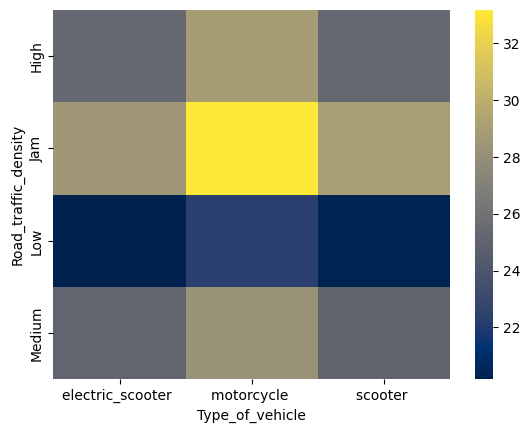

In [259]:
heatmap_data = traffic.pivot_table(values='Time_taken(min)' , index='Road_traffic_density', columns='Type_of_vehicle')
sns.heatmap(heatmap_data, cmap='cividis') 

### time effect on traffic 

In [260]:
traffic_group_df = pd.DataFrame(traffic.groupby('time_periods')['Road_traffic_density'].agg(lambda x :x.mode()[0])).reset_index()## the zero here is to make sure 
# if we have same amount of frequency in one value instead of list just return the first one 
traffic_group_df.to_csv("./data/visualizations_df/time_traffic.csv")
traffic_group_df

,time_periods,Road_traffic_density
0,00:00-04:00,Low
1,07:00-10:00,Low
2,10:00-13:00,High
3,13:00-16:00,High
4,16:00-19:00,Medium
5,19:00-22:00,Jam
6,22:00-23:59,Low


### traffic scatter visualization

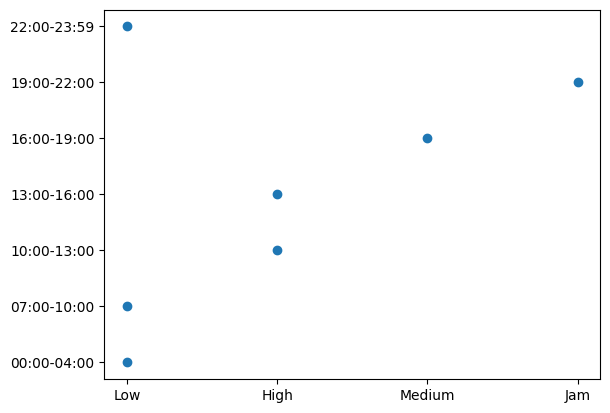

In [261]:
order = ['Low' , "Medium", "High" , "Jam"] 
traffic_group_df['Road_traffic_density'] = pd.Categorical(traffic_group_df['Road_traffic_density'], categories=order ,ordered=True )
fig , axes = plt.subplots() 
axes.scatter(traffic_group_df['Road_traffic_density'], traffic_group_df['time_periods'])

### Analyzing the effect of time periods on read traffic density and its visualization

,time_periods,Road_traffic_density
0,00:00-04:00,Low
1,07:00-10:00,Low
2,10:00-13:00,High
3,13:00-16:00,High
4,16:00-19:00,Medium
5,19:00-22:00,Jam
6,22:00-23:59,Low


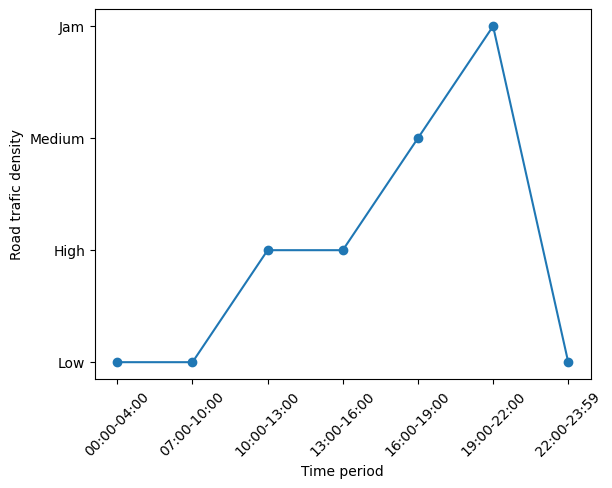

In [262]:
fig , axes = plt.subplots() 
axes.plot(traffic_group_df['time_periods'] , traffic_group_df['Road_traffic_density'] , marker="o")
plt.xticks(rotation=45);
axes.set_xlabel('Time period')
axes.set_ylabel('Road trafic density')
traffic_group_df


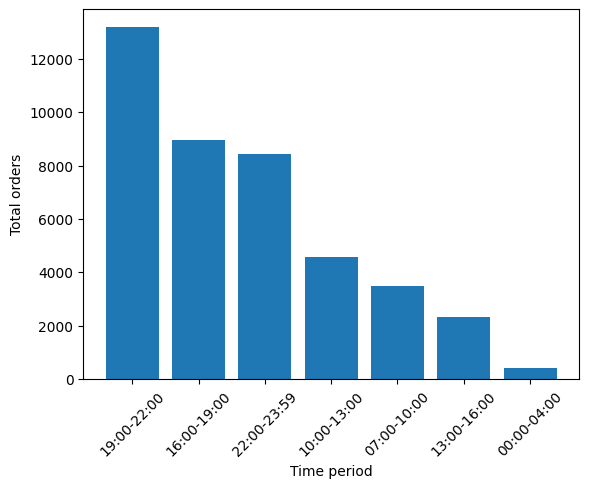

In [263]:
fig , axes  = plt.subplots() 
axes.bar(traffic['time_periods'].value_counts().index  , traffic['time_periods'].value_counts().values)
axes.set_xlabel('Time period')
axes.set_ylabel('Total orders')
plt.xticks(rotation=45);

### Analyzing data visualization and feature collaboration based on age

In [333]:
columns_to_convert = ['Delivery_person_Ratings', 'Delivery_person_Age'] 
whole_dataSet[columns_to_convert] = whole_dataSet[columns_to_convert].apply(pd.to_numeric)
age_df = whole_dataSet[['ID' ,'Delivery_person_Ratings' , 'Delivery_person_Age' , 'time_periods' , 'Time_taken(min)']]
age_df.to_csv('./data/visualizations_df/age_df.csv' , index=False)
age_df

,ID,Delivery_person_Ratings,Delivery_person_Age,time_periods,Time_taken(min)
0,0x4607,4.9,37,10:00-13:00,24
1,0xb379,4.5,34,19:00-22:00,33
2,0x5d6d,4.4,23,07:00-10:00,26
3,0x7a6a,4.7,38,16:00-19:00,21
4,0x70a2,4.6,32,13:00-16:00,30
...,...,...,...,...,...
45588,0x7c09,4.8,30,10:00-13:00,32
45589,0xd641,4.6,21,19:00-22:00,36
45590,0x4f8d,4.9,30,22:00-23:59,16
45591,0x5eee,4.7,20,13:00-16:00,26


Text(0, 0.5, 'Rating')

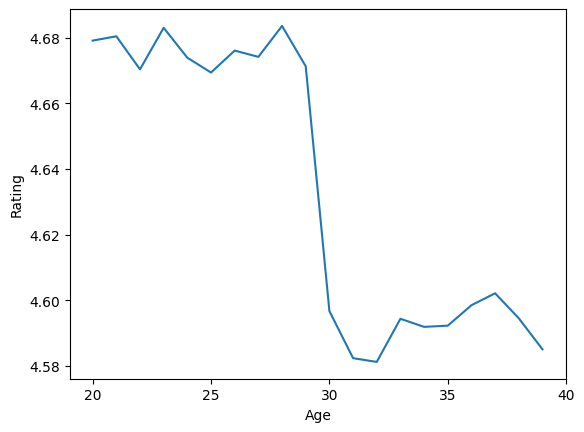

In [265]:
age_vs_rating_df = pd.DataFrame(age_df.groupby('Delivery_person_Age')['Delivery_person_Ratings'].mean()).reset_index()
fig ,axes = plt.subplots()
axes.plot(age_vs_rating_df['Delivery_person_Age'] , age_vs_rating_df['Delivery_person_Ratings'])
axes.set_xticks(range(20, 41, 5))
axes.set_xlabel('Age')
axes.set_ylabel('Rating')

Text(0, 0.5, 'Age')

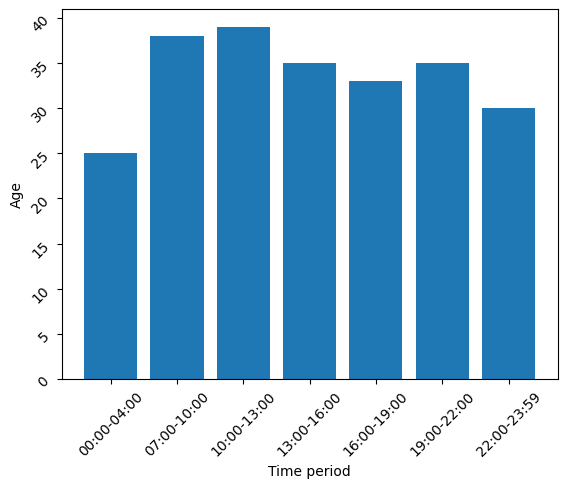

In [266]:
fr_age_df = pd.DataFrame(age_df.groupby('time_periods')['Delivery_person_Age'].agg(lambda x:x.mode()[0])).reset_index()
### checking most frequent deliver parson age and a period of time 
time_order = ['07:00-10:00', '10:00-13:00', '13:00-16:00', '16:00-19:00', '19:00-22:00', '22:00-23:59', '00:00-04:00']

fr_age_df['time_periods'] = pd.Categorical(fr_age_df['time_periods'], categories=time_order , ordered=True)
fig , axes = plt.subplots() 
fr_age_df
axes.bar(fr_age_df['time_periods'] , fr_age_df['Delivery_person_Age'])
axes.tick_params(rotation=45)
axes.set_xlabel('Time period')
axes.set_ylabel('Age')


,age_group,count
3,20-25,10126
2,25-30,10138
1,30-35,10447
0,35-40,10657


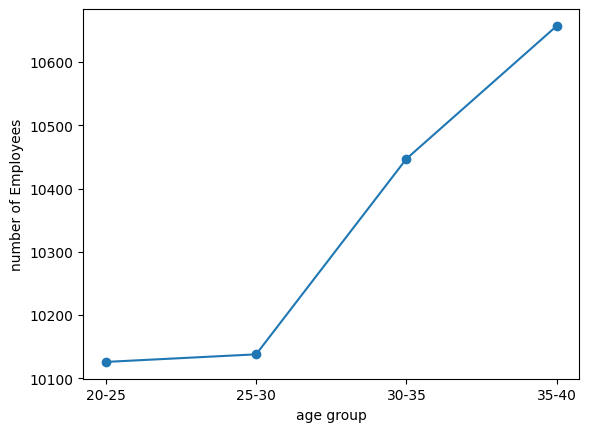

In [332]:
Employees_df = whole_dataSet.drop_duplicates(subset='ID')
Employees_df.replace('NaN ' , np.nan , inplace=True)
Employees_df.dropna(inplace=True)
bins =[20 , 25 , 30 , 35, 40]
labels= ['20-25' , '25-30' , '30-35' ,'35-40']
Employees_df['age_group'] = pd.cut(Employees_df['Delivery_person_Age'], bins=bins, labels=labels, right=False)

Employees_count = Employees_df['age_group'].value_counts().reset_index()
Employees_count.sort_values('age_group', inplace=True)

fig , axes = plt.subplots()
axes.plot(Employees_count['age_group'] , Employees_count['count'] , marker ='o')
axes.set_ylabel('number of Employees')
axes.set_xlabel('age group')
Employees_count

In [268]:
age_df.sample(frac=.0001)

,Delivery_person_Ratings,Delivery_person_Age,time_periods,Time_taken(min)
30045,4.4,39,19:00-22:00,44
7832,4.7,36,16:00-19:00,28
23243,4.8,29,16:00-19:00,28
21419,4.5,32,19:00-22:00,25


Text(0, 0.5, 'delivery time')

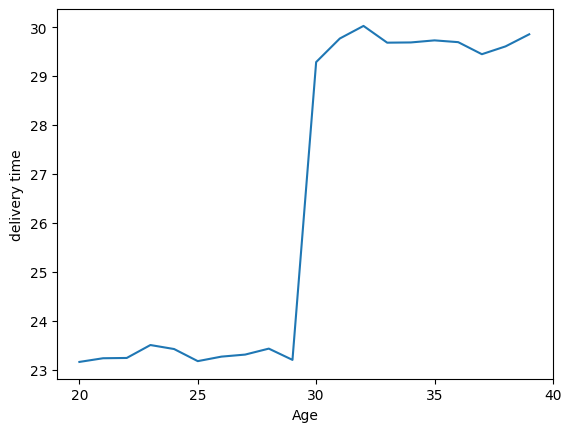

In [269]:
age_vs_timeTaken_df = pd.DataFrame(age_df.groupby('Delivery_person_Age')['Time_taken(min)'].mean()).reset_index()
fig ,axes = plt.subplots() 
axes.plot(age_vs_timeTaken_df['Delivery_person_Age'] , age_vs_timeTaken_df['Time_taken(min)'])
axes.set_xticks(range(20 , 41 ,5));
axes.set_xlabel('Age')
axes.set_ylabel('delivery time')

(<Axes: xlabel='Time_taken(min)', ylabel='Delivery_person_Ratings'>,)

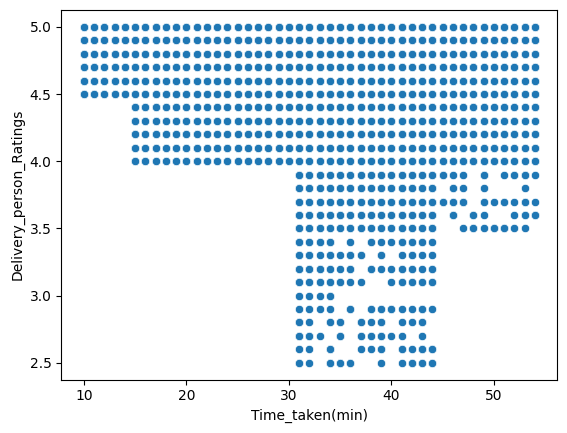

In [270]:
age_df 
sns.scatterplot(data= age_df , x='Time_taken(min)' , y='Delivery_person_Ratings') ,

### heatmap between rating , time_taken and age

C:\Users\Alchemist\AppData\Local\Temp\ipykernel_15060\1944306426.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = age_df_cp.pivot_table(values='Delivery_person_Ratings', index='Age_Group', columns='Time_Group')


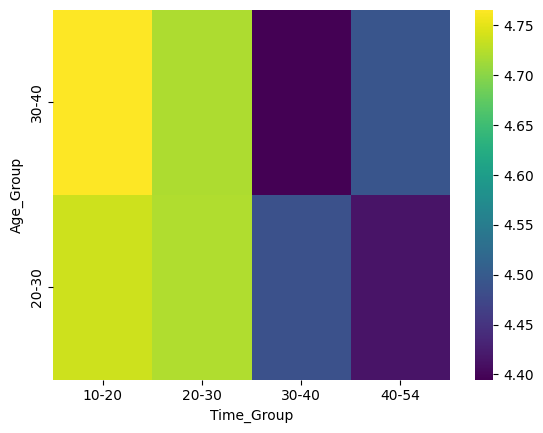

<Figure size 1500x500 with 0 Axes>

In [271]:
age_bins = [20, 30, 40, 50, 60]
time_bins = [10, 20,30, 40,  54]

age_labels = ['20-30', '30-40', '40-50', '50-60']
time_labels = ['10-20','20-30' , '30-40' ,'40-54']
age_df_cp = age_df.copy()
age_df_cp['Age_Group'] = pd.cut(age_df_cp['Delivery_person_Age'], bins=age_bins, labels=age_labels, right=False)
age_df_cp['Time_Group'] = pd.cut(age_df_cp['Time_taken(min)'], bins=time_bins, labels=time_labels, right=False)
pivot_table = age_df_cp.pivot_table(values='Delivery_person_Ratings', index='Age_Group', columns='Time_Group')
heatmap_rating_time_age = sns.heatmap(pivot_table, cmap='viridis')
plt.figure(figsize=(15 , 5))
heatmap_rating_time_age.invert_yaxis()
age_df_cp.to_csv('.//data/visualizations_df/age_df_group.csv')

### Analyzing the effect of date on food delivery time orders and traffic








### creating date period

In [272]:
date_df = whole_dataSet[['Festival' , 'Order_Date' , 'Time_taken(min)' ,'time_periods', 'Road_traffic_density']].copy()

date_bins = [
    pd.to_datetime('2022-02-01'),#1
    pd.to_datetime('2022-02-10'),#2
    pd.to_datetime('2022-02-20'),#3
    pd.to_datetime('2022-02-28'),#4
    pd.to_datetime('2022-03-10'),#5
    pd.to_datetime('2022-03-20'),#6
    pd.to_datetime('2022-03-31'),#7
    pd.to_datetime('2022-04-10'),#8
    pd.to_datetime('2022-04-20'),#9
    pd.to_datetime('2022-04-30'),#10
]

labels = [
    '2022-02-01 - 2022-02-10', #1
    '2022-02-10 - 2022-02-20', #2
    '2022-02-20 - 2022-02-28', #3
    '2022-03-01 - 2022-03-10', #4
    '2022-03-10 - 2022-03-20', #5
    '2022-03-20 - 2022-03-31', #6
    '2022-04-01 - 2022-04-10', #7
    '2022-04-10 - 2022-04-20', #8
    '2022-04-20 - 2022-04-30', #9
    '2022-04-30 - 2022-05-01' #10
]

def create_periods(x):
    for i in range(len(date_bins) -1) : 
        if date_bins[i]<= x <= date_bins[i+1]:
            return labels[i]    

date_df.loc[: , 'Order_Date_period'] = date_df['Order_Date'].apply(create_periods)
date_df.to_csv('.//data/visualizations_df/date_df.csv')
date_df.sample(frac=.0001)

# points :  for larger date range we can create date range and pd.cut
# start_date = pd.to_datetime('2022-02-01')
# end_date = pd.to_datetime('2022-02-28')

# date_bins = pd.date_range(start=start_date , end=end_date, freq='10D') 
# date_bins
# labels =[f"{date_bins[i].stfrtime('%y-%m-%d')}- {date_bins[i+1].strftime('%y-%m-%d')}" for i in range(len(date_bins)-1)]


,Festival,Order_Date,Time_taken(min),time_periods,Road_traffic_density,Order_Date_period
34618,No,2022-03-24,21,19:00-22:00,Jam,2022-03-20 - 2022-03-31
30536,No,2022-02-11,26,10:00-13:00,High,2022-02-10 - 2022-02-20
5431,No,2022-03-17,31,19:00-22:00,Jam,2022-03-10 - 2022-03-20
1325,No,2022-03-08,27,22:00-23:59,Low,2022-03-01 - 2022-03-10


In [273]:
group_date = date_df.groupby('Order_Date_period').size().reset_index(name='total_order')
group_date

,Order_Date_period,total_order
0,2022-02-10 - 2022-02-20,6585
1,2022-03-01 - 2022-03-10,9748
2,2022-03-10 - 2022-03-20,9647
3,2022-03-20 - 2022-03-31,9621
4,2022-04-01 - 2022-04-10,5767


Text(0, 0.5, 'total orders')

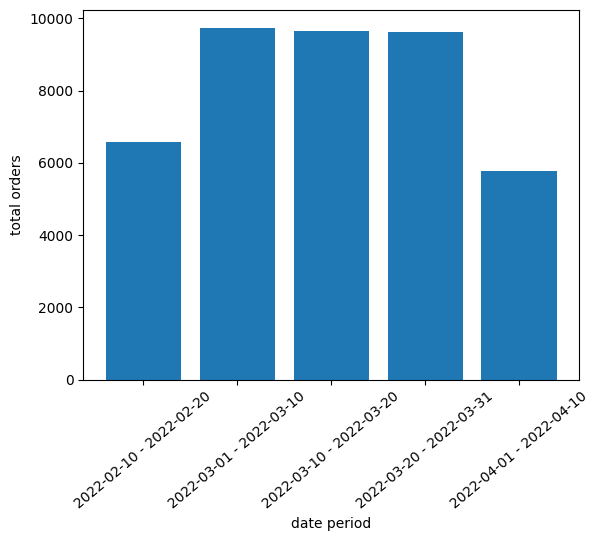

In [274]:
fig , axes = plt.subplots()
axes.bar(group_date['Order_Date_period'] , group_date['total_order'])
plt.xticks(rotation=40)
axes.set_xlabel('date period')
axes.set_ylabel('total orders')

In [275]:
festival_group = date_df.groupby('Order_Date_period')['Festival'].value_counts().reset_index()

Text(0, 0.5, 'Count')

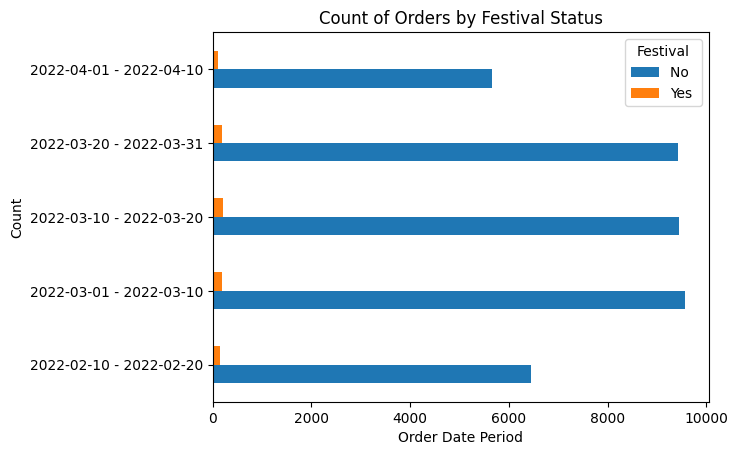

In [276]:
pivot_df = festival_group.pivot_table(index='Order_Date_period', columns='Festival', values='count')
pivot_df.plot(kind='barh')
plt.title('Count of Orders by Festival Status')
plt.xlabel('Order Date Period')
plt.ylabel('Count')

In [277]:
count_df = date_df.groupby(['Order_Date_period', 'Road_traffic_density']).size().reset_index(name='count')
count_df

,Order_Date_period,Road_traffic_density,count
0,2022-02-10 - 2022-02-20,High,644
1,2022-02-10 - 2022-02-20,Jam,2133
2,2022-02-10 - 2022-02-20,Low,2182
3,2022-02-10 - 2022-02-20,Medium,1626
4,2022-03-01 - 2022-03-10,High,942
5,2022-03-01 - 2022-03-10,Jam,3054
6,2022-03-01 - 2022-03-10,Low,3361
7,2022-03-01 - 2022-03-10,Medium,2391
8,2022-03-10 - 2022-03-20,High,914
9,2022-03-10 - 2022-03-20,Jam,3114


<Axes: xlabel='total orders', ylabel='Order_Date_period'>

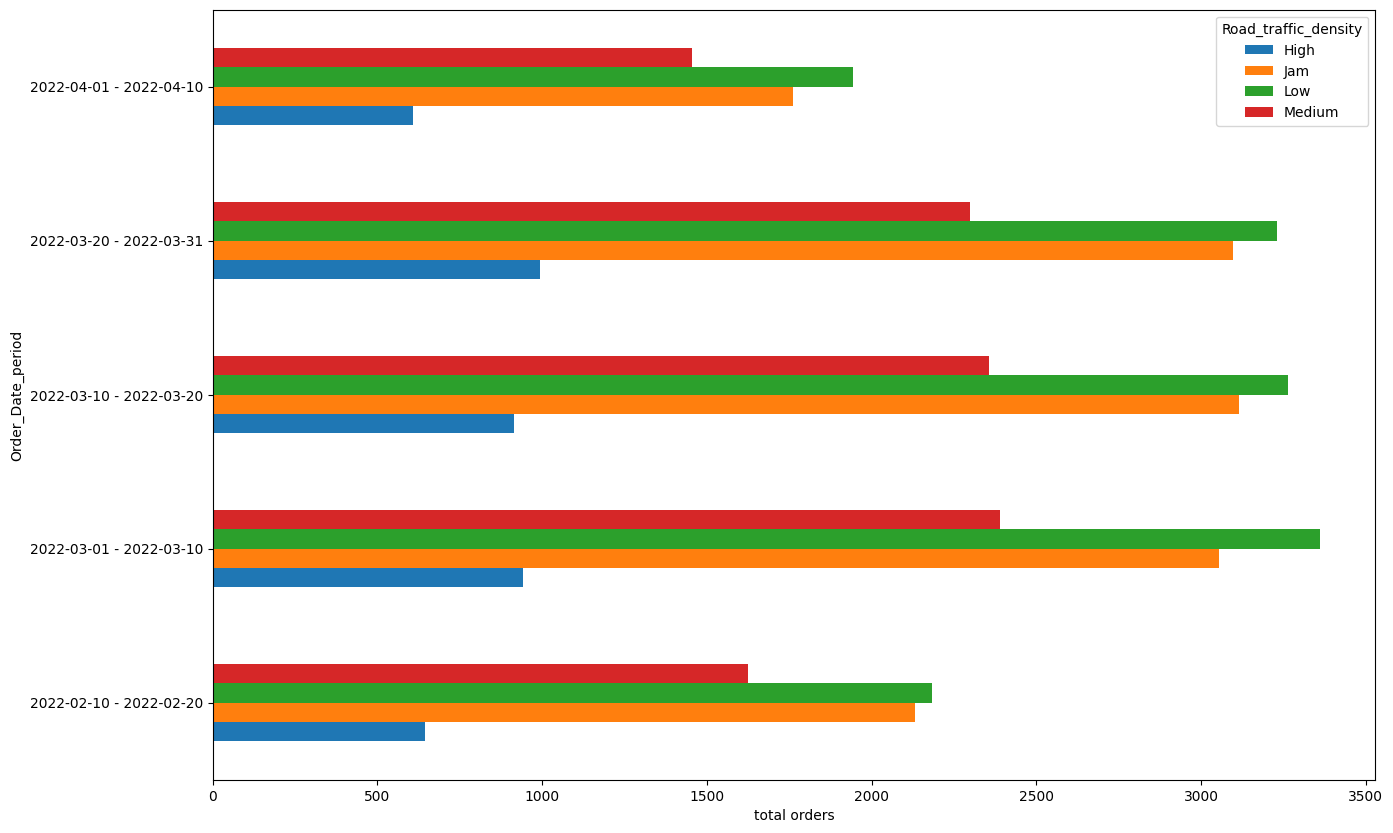

In [278]:
pivot_date_df = pd.pivot_table(count_df , index='Order_Date_period' , columns='Road_traffic_density' , values='count')
pivot_date_df.plot(kind='barh' , figsize=(15 ,10) , xlabel='total orders')